# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/Users/nikkpavlov/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [2]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')
#news_raw.head(5)
#news_raw.shape
news_raw.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


(2) ***Your answer goes here:***
The modified dataset has 2129 documents. Each document is classified and the dataset holds information about the number of occurances (one added) of 520 words for each document. Therefore, the size of the data-frame has dimensions of (2129, 521). From the describe() method we can see that the mean of each attribute (except class) is roughly between 5 and 10, with standard deviation between 38 and 48, roughly. Every attribute occurs minimum one times (because of the +1 addition) and the maximum value for the attributes is usually above 550. This great variation explains values of the standard deviation. Furthermore, most of the words have a 75% percentile mark of 1-7 which means that in 75% of cases the word only occurs 1-7 (1 added) times in a document.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [3]:
# (1) # Your Code goes here:
news_raw.keys()[0:10].tolist()

['w1_aaa',
 'w2_pins',
 'w3_kmr',
 'w4_notion',
 'w5_queens',
 'w6_dwyer',
 'w7_defenseman',
 'w8_gld',
 'w9_tocchet',
 'w10_home']

(2) ***Your answer goes here:***
All attribute names have "wNUM_" as the beginning of their name, showing the word number. After that the actual word is displayed.
#TODO Add more?

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

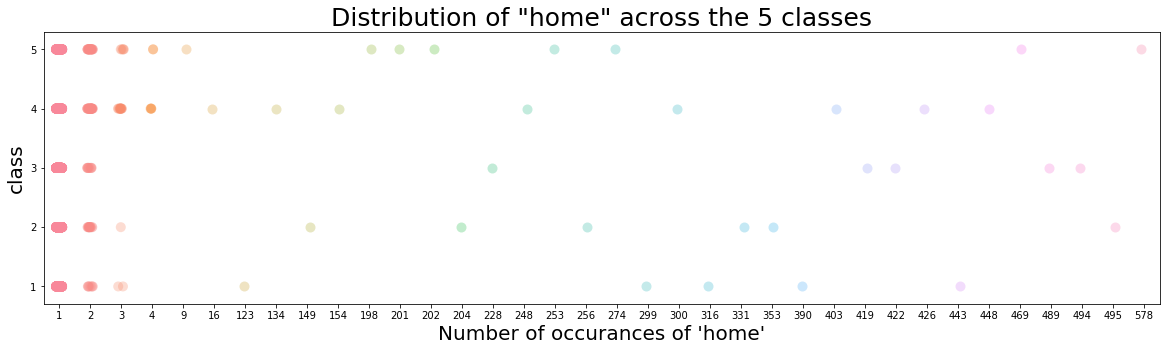

In [35]:
# (1) # Your Code goes here:
plt.figure(figsize=(20,5))
plot = sns.stripplot(x='w10_home', y='class', data=news_raw, jitter=True, alpha=0.3, size=10)
plt.xlabel("Number of occurances of 'home'", fontsize=20)
plt.ylabel("class", fontsize=20)
plt.title('Distribution of "home" across the 5 classes', fontsize=25)
plt.show()


(2) ***Your answer goes here:***
The first thing to observe of the plot is that the x axis is not continuous - it only shows values that have been observed in the dataset. The next important thing is that there is a concentration of values around 1-4. This means that oftentimes the word has not been present (or has only few occurances) in the document. Furthermore, only around 30 datapoints are greater than 4. Comparing this to all the 2000+ documents we have means that words mostly occur less than 10 times and only in a handful of documents they occur much more often.

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from `news_raw` and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

/Users/nikkpavlov/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/nikkpavlov/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


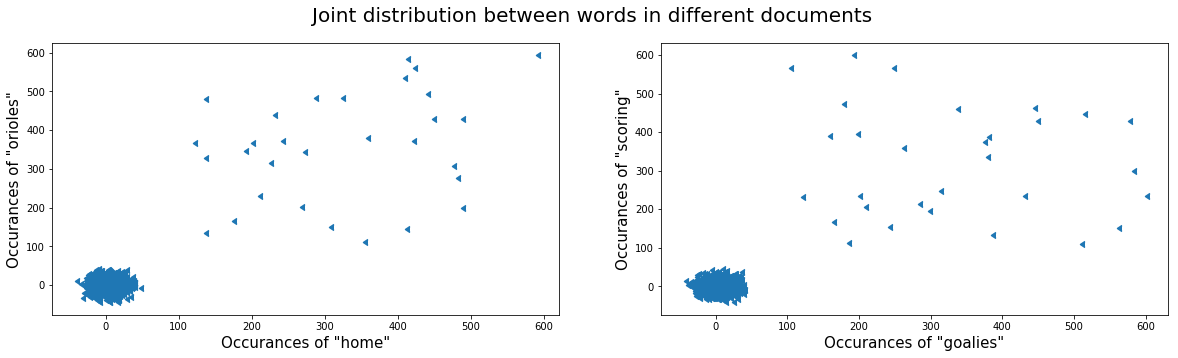

In [38]:
# (1) # Your Code goes here:
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
f.suptitle('Joint distribution between words in different documents', fontsize=20)
plt.subplot(121)
scatter_jitter(arr1=news_raw['w10_home'],arr2=news_raw['w210_orioles'],jitter=0.3)
plt.xlabel('Occurances of "home"', fontsize=15)
plt.ylabel('Occurances of "orioles"', fontsize=15)
plt.subplot(122)
scatter_jitter(arr1=news_raw['w60_goalies'],arr2=news_raw['w330_scoring'], jitter=0.3)
plt.xlabel('Occurances of "goalies"', fontsize=15)
plt.ylabel('Occurances of "scoring"', fontsize=15)
plt.show()

(2) ***Your answer goes here:***
From the two plots we can see that the biggest probability densitity is around (1,1) coordinates. What this means is that if a word does not appear or has a small number of occurances in a document, the other word also probably does not occur too often in it. 
To be an outlier, the datapoint needs to either be erroneous or extreme (i.e. nowhere near another datapoint). In our bag-of-words example an erroneous data point would be if a word occured negative amount of times, where as an extreme datapoint for example would be if a specific word represents 10% or more of all words in the document (provided this is not a stopword). Therefore, this graphing method is not the best for representing this. Furthermore, the probability density around (1,1) is too big - even if you set jitter=1 you cannot begin to distinguish some of the datapoints in that area. With smaller jitter, the graph feels like it has some kind of a linear correlation. However, the datapoints that are above (100,100) are again only few - so those could be outliers in the dataset. To visualise how dense exactly the area around (1,1) we could use a loglog plot.

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of documents in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) ***Your answer goes here:***
As we can see from the last few exercises, there seem to be documents which have an unusually high number of word occurances. As those are a fairly small percentage of the whole data they might heavily influence our classifier. Having looked at the sum of total words per document, there is a group of documents that have more than 170,000 words in total, whereas everything else has less than 4000. As the differences in those two group is more than 2 orders of magnitude, the smaller group will skew our results too much. Furthermore, we should remove all instances where 0 is a value (since we have added +1)

/Users/nikkpavlov/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/nikkpavlov/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


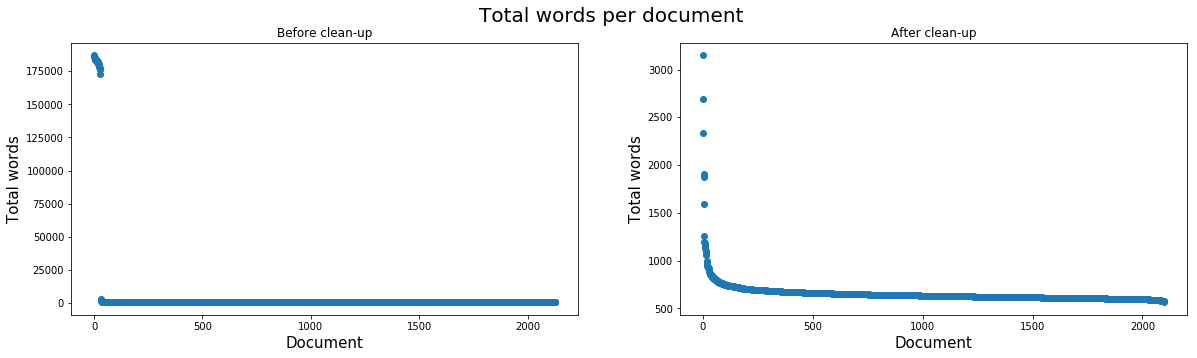

In [59]:
# (2) # Your Code goes here:
sums = np.sum(news_raw, axis=1)
sums_list = sums.tolist()
total_words = sorted(sums, reverse=True)
too_many_words = [x for x in total_words if x>4000]
indices = [sums_list.index(x) for x in sums if x in too_many_words]
news_clean = news_raw.copy(deep=True)
news_clean.drop(news_clean.index[indices], inplace=True)

#minimas = np.min(news_raw, axis=1)
#print(np.min(minimas)) <--- No values below 1, so nothing to remove

f2 = plt.figure(figsize=(20,5))
axis1 = f.add_subplot(121)
axis2 = f.add_subplot(122)
f2.suptitle('Total words per document', fontsize=20)
plt.subplot(121)
plt.scatter(x=range(len(total_words)),y=total_words)
plt.xlabel('Document', fontsize=15)
plt.ylabel('Total words', fontsize=15)
plt.title('Before clean-up')
plt.subplot(122)
normal_words = [x for x in total_words if x <4000]
plt.scatter(range(len(normal_words)),normal_words)
plt.xlabel('Document', fontsize=15)
plt.ylabel('Total words', fontsize=15)
plt.title('After clean-up')
plt.show()


(3) ***Your answer goes here:***
The shape of the new dataset is (2099, 521) - i.e. the features are still the same, we are tracking 520 words, the last one is the document classification. However, now we only have 2099 documents left. This means that we have removed 30 documents (as we roughly predicted).

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

In [77]:
# (1) # Your Code goes here:
#indices = [sums_list.index(x) for x in sums if x in too_many_words]
bad_example = indices[0:5]
good_example = [x for x in range(len(sums)) if x not in indices][0:5]
bad = news_raw.loc[bad_example, :]
good = news_raw.loc[good_example, :]
frames = [bad, good]
result = pd.concat(frames)
result


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
123,106,583,395,336,309,505,238,361,140,469,...,329,213,296,305,331,541,398,444,200,5
159,211,561,565,277,181,418,165,216,528,331,...,536,540,177,216,526,218,459,356,284,2
196,207,115,166,455,365,436,305,536,232,274,...,248,318,235,335,377,231,225,458,251,5
222,428,227,245,463,426,468,164,510,315,154,...,161,240,203,163,436,410,289,380,576,4
242,318,543,379,543,286,207,305,475,458,123,...,180,203,263,227,429,123,339,309,417,1
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


(2) ***Your answer goes here:***
The first five rows represent outlier documents, the last five - inliers. As can be seen, the outlier documents have word frequencies of above 100 for every word, whereas the inlier have frequencies of mostly 1, going up to 7-8. There is an order of magnitude difference of 2. 
Regarding outliers, they should not be removed from the testing set. By default, they should be a small percentage of the test set - so even if the classifier gets them all wrong, this should not influence precision and recall too much. Furthermore, in the real world not all data is accurate, not all of it "fits", so the classifier should be able to work on those examples as well.

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [122]:
# Your Code goes here:
data_path2 = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path2, delimiter = ',')
data_path3 = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path3, delimiter = ',')
#news_train.head(5)
#news_test.head(5)
news_train.describe(), news_test.describe()
#print(news_train.shape)
#print(news_test.shape)

(            w1_aaa      w2_pins       w3_kmr    w4_notion    w5_queens  \
 count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
 mean      1.025727     1.017627     1.014769     1.008576     1.006193   
 std       0.280109     0.205208     0.172657     0.115206     0.078473   
 min       1.000000     1.000000     1.000000     1.000000     1.000000   
 25%       1.000000     1.000000     1.000000     1.000000     1.000000   
 50%       1.000000     1.000000     1.000000     1.000000     1.000000   
 75%       1.000000     1.000000     1.000000     1.000000     1.000000   
 max       8.000000     7.000000     5.000000     4.000000     2.000000   
 
           w6_dwyer  w7_defenseman       w8_gld   w9_tocchet     w10_home  \
 count  2099.000000    2099.000000  2099.000000  2099.000000  2099.000000   
 mean      1.010481       1.026203     1.024297     1.012387     1.084326   
 std       0.134174       0.618880     0.274219     0.153879     0.491139   
 min       1.00

### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***
The assumption in Naïve Bayes is that the features are independent of each other. In our case this would mean that e.g. the occurance of "tennis" is unrelated to the occurance of "court" which is not true.
The main issue is that we would have to include that correlation in our correlation - which means we would need more samples/data to achieve the same accuracy. In our case this would mean that a covariance matrix of 520X520 would have to be created which entails the calculation of around 135,000 parameters. This is too expensive and can easily be polluted with noise given our training set of 2099 documents.


### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

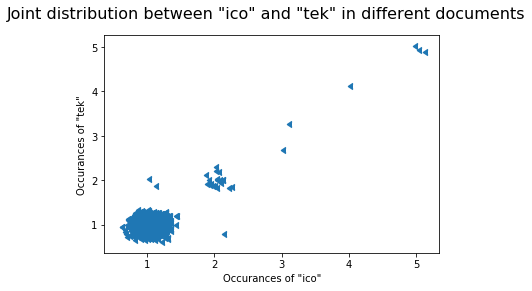

In [95]:
# (1) # Your Code goes here:
#f = plt.figure(figsize=(20,5))
fig = plt.figure()
fig.suptitle('Joint distribution between "ico" and "tek" in different documents', fontsize=16)
plt.xlabel('Occurances of "ico"')
plt.ylabel('Occurances of "tek"')
scatter_jitter(arr1=news_train['w281_ico'],arr2=news_train['w273_tek'],jitter=0.6)

(2) ***Your answer goes here:***
We observe an almost perfect 1-to-1 linear dependency between the two features. If "ico" is in the document n times then it is highly likely "tek" will be in it as well - there are only 3 instances that defy this rule. This is an example where actually having the correlations between the different features would be useful. However, this is not true for every two features. We have 520 of them so although some might be highly correlated, most will not be, so this does not impact the assumption significantly.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***
The simplest classifier would be just to pick the class at random. Another option would just be to use the prior probability of each class.

In [123]:
# (2) # Your Code goes here:
import sklearn.dummy
train_copy = news_train.copy(deep=True)
X = train_copy.drop('class', axis=1)
y = train_copy['class']
dumb = sklearn.dummy.DummyClassifier(strategy='prior')
dumb.fit(X, y)
tr_pred = dumb.predict(X=X)
#print("%.2f" % a)
print("Baseline accuracy: %.2f" % round(dumb.score(X=X, y=y), 2))

Baseline accuracy: 0.21


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [141]:
# (1) # Your Code goes here:
gnb = GaussianNB()
gnb.fit(X=X, y=y)
gaussian = gnb.predict(X=X)

In [157]:
# (2) # Your Code goes here:
#import sklearn.metrics
accuracy = accuracy_score(y, gaussian)
#recall = sklearn.metrics.recall_score(y,gaussian,average='weighted')
print("Gaussian classifier accuracy: %.2f" % round(accuracy, 2))
#print("Gaussian classifier accuracy: %.2f" % round(recall, 2))
cm2 = confusion_matrix(y, gaussian)
print("Confusion matrix:\n" + str(cm2))

Gaussian classifier accuracy: 0.88
Confusion matrix:
[[351   1  11   0   0]
 [  0 272 149   0   0]
 [  0   8 414   0   0]
 [  1   2  28 416   0]
 [  0   1  14  41 390]]


(3) ***Your answer goes here:***
The performance in comparison to the baseline has greatly increased - it's quadripled. Usually, accuracy is not enough to say for sure if a classifier is good. Another such measure would be the recall - ratio of the documents that we were looking for over the total documents in that particular class. In our case this is the same as the accuracy. In this dataset the prior probabilities are almost uniform so predictions cannot be skewed - i.e. one class is not predominant.

#TODO: Add more???

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***
The maximal values in the matrix are along the diagonal which is expected - as there is high accuracy, most classes would have been predicted to be themselves. We know that topic 1 is different from the others and that topic 2 and 3 as well as topic 4 and 5 are correlated. This explains why a lot of examples from class 2 are predicted to be from class 3 (149) and a lot of class 5 instances are predicted to be class 4 (41). We would usually expected the opposite to be true (i.e. instances from class 3 to be predicted as class 2) but this is not necessary - it just shows that one class can be confused with the other more often than the other way around.

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

In [164]:
# (1) # Your Code goes here:
test_copy = news_test.copy(deep=True)
X_test = test_copy.drop('class', axis=1)
y_test = test_copy['class']
prediction = gnb.predict(X_test)
accuracy_test = accuracy_score(y_test, prediction)
print("Gaussian classifier accuracy on test set: %.2f" % round(accuracy_test, 2))
#recall = sklearn.metrics.recall_score(y_test,prediction,average='weighted')
#print("Gaussian classifier accuracy: %.2f" % round(recall, 2))
cm3 = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n" + str(cm3))

Gaussian classifier accuracy on test set: 0.82
Confusion matrix:
[[19  0  0  1  0]
 [ 0 19 13  0  0]
 [ 0  2 20  0  0]
 [ 0  0  3 23  0]
 [ 0  0  0  4 24]]


In [166]:
# (2) # Your Code goes here:
test_dump = dumb.predict(X=X_test)
#print("%.2f" % a)
print("Baseline accuracy for test set: %.2f" % round(dumb.score(X=X_test, y=y_test), 2))

Baseline accuracy for test set: 0.20


(3) ***Your answer goes here:***
The predicition accuracy for the test set is 82% - 6% less than on the training set itself. This is expected as the classifier is working on data that it actually has not seen before (as opposed to the case when it's trying to classify the training set). The distribution within the confusion matrix is pretty much identical between the testing and training set - biggest values are on the diagonals with class 2 often mistaken for 3 and class 5 mistaken for 4.
The dummy classifier's accuracy has gone down by 2% which is insignificant and something we'd expect - all the classes have a uniform distribution so a dummy classifier is expected to have an accuracy of around 20%.

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [170]:
# (1) # Your Code goes here:
gnb_raw = GaussianNB()
news_raw_copy = news_raw.copy(deep=True)
X_raw = news_raw_copy.drop('class', axis=1)
y_raw = news_raw_copy['class']
gnb_raw.fit(X=X_raw, y=y_raw)
prediction_raw = gnb_raw.predict(X=X_test)
accuracy_raw = accuracy_score(y_test, prediction_raw)
print("Gaussian classifier (trained on raw dataset) accuracy on test set: %.2f" % round(accuracy_raw, 2))

Gaussian classifier (trained on raw dataset) accuracy on test set: 0.17


(2) ***Your answer goes here:***
The accuracy of the classifier trained on the raw dataset has accuracy of only 17%. Compared to the accuracy of the cleaned dataset, there is a stark difference. Therefore, the outliers in the data have a stark influence on the classifier's capabilities. Cleaning affects the classifier because it removes datapoints that can potentially give non-sensical results (for example a word with negative frequency) or results that get skewed a lot by a small number of datapoints. As we have seen there is 2 magnitudes of difference between the outliers and the "normal" data. Therefore, although the datapoints were only 30, they have a much bigger effect on the classifier than the rest of the datasets.

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***
As we are using a Gaussian distribution, the classifier assumes that the features (words) follow a Gaussian distribution. The calculation uses the standard deviation of the features between the documents, so the great variability in the documents' length would influence that as we have seen - the standard deviation of the raw data is above 40, whereas in the cleaned data it is close to 0. That's why, including those outliers in the data has such a negative effect on the classifier - it makes it worse than the dummy classifier.
In contrast, the Multinomial Naïve Bayes would use the frequency of the features in each document rather than their mean and standard deviation within the classes.